# Intro to `xarray`
This overview will cover the basics of 
the data structures, concepts, and capabilities 
of xarray. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

For this walkthrough we will just use one of the 
included tutorial data. We will use the one simply
named "air_temperature", but you can see a list
of other available tutorial datasets here:
https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html

The first thing we will do is just output the result
as `ds` so that we can see what it looks like.
`xarray` gives a really nice overview representation
when you do this in something like VSCode or Jupyter.
It shows all of the dimensions, coordinates, variables,
and attributes in the dataset in a way that makes it
very easy to browse around. Try playing with the output
a little bit to see what's in the data.

In [6]:
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Okay, now let's dive in a bit further into the core data
structures and how they're laid out. We'll tackle this in 
the order they're presented in the output from the last
code cell, starting with dimensions. A "dimension" in 
xarray world is a label for the axis of an array. You
can see we have 3 dimensions in the dataset, `lat`, `lon`,
and `time`. These are displayed with the shape of the
underlying array in the printout. You can also inspect
them for a given dataset, `ds`, like so:
   

In [7]:
ds.dims

FrozenMappingWarningOnValuesAccess({'lat': 25, 'time': 2920, 'lon': 53})

Under the hood, the `ds.dims` object is just a dictionary
that maps a name (with a string datatype) to a size (with
an integer datatype). That is, it maps a string to an integer
You can see this by pulling one of the dims out directly:
   

In [8]:
ds.dims['lat']

/var/folders/7c/k9ztpxkn35s1mbm2kjthjwz80000gn/T/ipykernel_66129/3362596132.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds.dims['lat']


25

Similar to dimensions, in xarray the `coordinates` are
some helper/extra data pieces which make operating on the
main data more intuitive/simpler. If dimensions map between
the axis of an array and it's "name", then coordinates map 
between the index in the array to a real "place" in some
space that is intuitive for humans to understand. 
You can access them in a similar way to how the dimensions
are accessed:
   

In [9]:
ds.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

If you want to look at an individual coordinate you can just
access it like you would a column in a pandas dataframe:
   

In [10]:
ds['time']

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

Similarly, you can be very specific and specify explicitly
that what you want is a coordinate:
   

In [11]:
ds.coords['time']

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

Next up is "data variables". These are specified with names
just like the coordinates and dimensions. Note here you still
see the dimensions and coordinates, and get a very similar 
interface as we did when we showed the full `ds`. This is not
an accident, and one of the major insights in the xarray data 
model is data should almost awlays come with the attached metadata
so that you can easily understand what you're looking at.

In [12]:
ds['air']

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Speaking of metadata, you can see the the `ds['air']` variable
has some "Attributes" if you want you can just explore them via
the widget from the previous cell. You can also see them directly
in the code via:
   

In [13]:
ds['air'].attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype='>f4')}

Dataset objects can contain multiple variables. The dataset
from the tutorial here only has a single one, the air temperature
but we can easily add a new variable, "pressure", using our
trusty function from the beginning of the course:
   

In [14]:
def air_pressure_at_height_and_temp(h, T0):
    p0 = 101325      # reference pressure in pascals
    M = 0.02896968   # molar mass of air kg/mol
    g = 9.81         # gravity m/s^2
    R0 = 8.314462618 # gas constant J/(mol·K) 
    T = T0           # temp in kelvin

    ratio = -(g * h * M) / (R0 * T)
    p_h = p0 * np.exp(ratio)
    return p_h

ds['pressure'] = air_pressure_at_height_and_temp(2.0, ds['air'])
# Adding some metadata, this part is optional, but good practice!!
ds['pressure'].attrs['units'] = 'Pa'
ds['pressure'].attrs['long_name'] = 'Standard air pressure at 2m'
ds

<xarray.Dataset>
Dimensions:   (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat       (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon       (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time      (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air       (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    pressure  (time, lat, lon) float64 1.013e+05 1.013e+05 ... 1.013e+05
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

But what can we do with all of this? First, just to prove 
something let's grab out the underlying data from the 'air'
variable. This can be done with `ds['air].values` and will
return the numpy array with all of the nice stuff stripped
away. We'll look at the shape and see it's exactly what the
dimensions said. 

NOTE: Generally you don't want to drop down into accessing
the raw numpy array unless you *really* have to. I'm just
showing you this to make it clear that the data really does
exist!

In [15]:
print(type(ds['air'].values), ds['air'].values.shape)

<class 'numpy.ndarray'> (2920, 25, 53)


Okay, back to doing stuff with xarray. There are two 
main ways to select data out of xarray objects,:
- `ds.isel`: using indices to select data (like numpy)
- `ds.sel`: using coordinates to select data
Getting the first time:

In [16]:
first_time_isel = ds.isel(time=0)
first_time_isel

<xarray.Dataset>
Dimensions:   (lat: 25, lon: 53)
Coordinates:
  * lat       (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon       (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time      datetime64[ns] 2013-01-01
Data variables:
    air       (lat, lon) float32 241.2 242.5 243.5 244.0 ... 296.9 296.8 296.6
    pressure  (lat, lon) float64 1.013e+05 1.013e+05 ... 1.013e+05 1.013e+05
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [17]:
# Similarly we could to this
first_time_sel = ds.sel(time='2013-01-01 00:00')
print(first_time_sel == first_time_isel)

<xarray.Dataset>
Dimensions:   (lat: 25, lon: 53)
Coordinates:
  * lat       (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon       (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time      datetime64[ns] 2013-01-01
Data variables:
    air       (lat, lon) bool True True True True True ... True True True True
    pressure  (lat, lon) bool True True True True True ... True True True True


We can also select out multiple coordinates
at a time. Note here I'm using, `method='nearest'`
so that we pull out the closest latitude and longitude
to the points specified. Try running without that
and see if you can figure out why the error occurs!

In [18]:
tucson_lat = 32.2540
tucson_lon = 360.0 - 110.9742

tucson_ds = ds.sel(
    lat=tucson_lat, 
    lon=tucson_lon, 
    method='nearest'
)
tucson_ds

<xarray.Dataset>
Dimensions:   (time: 2920)
Coordinates:
    lat       float32 32.5
    lon       float32 250.0
  * time      (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air       (time) float32 275.2 271.6 270.7 274.5 ... 283.6 278.1 278.1 281.0
    pressure  (time) float64 1.013e+05 1.013e+05 ... 1.013e+05 1.013e+05
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

xarray has much more capabilities than just indexing 
and adding labels to axes. It has a lot of capability
around plotting. For instance we can just pull out
the air temperature variable for the Tucson subset
and call ".plot()" on it. xarray generally tries to
make an intuitive type of plto for the dimensions that
you give it to plot with, so here we get a timeseries.

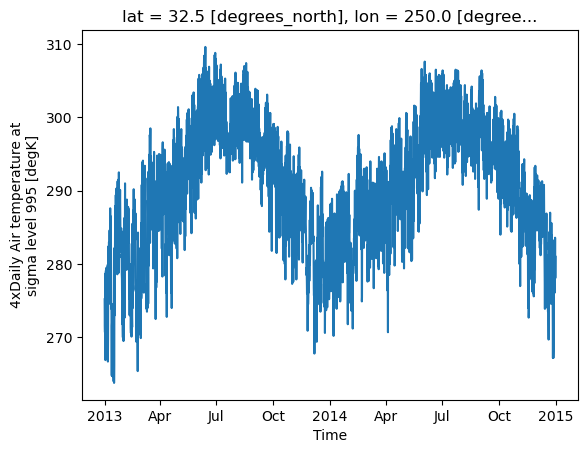

In [19]:
tucson_ds['air'].plot()

Similarly, we can plot the pressure that we calculated
from the temperature. The plots look pretty much identical
since they're derived from eachother. But note how we 
get the axis labels including human readable timestamps,
understandable names, and units all in the plot automatically!

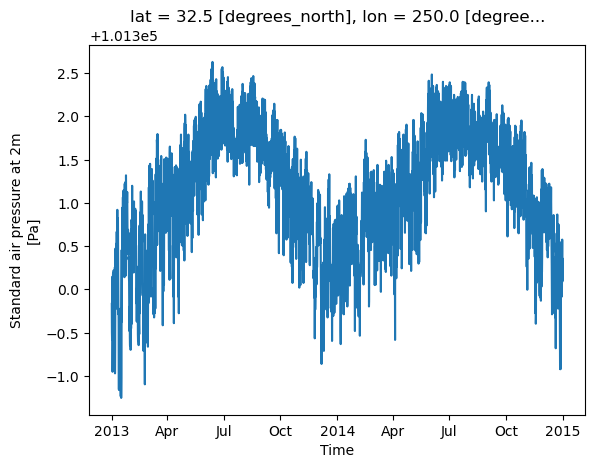

In [20]:
tucson_ds['pressure'].plot()

As mentioned, xarray will try to do the right thing when
you call ".plot()" on something. For instance, if we select
out a particular time and plot it we get a map:
   

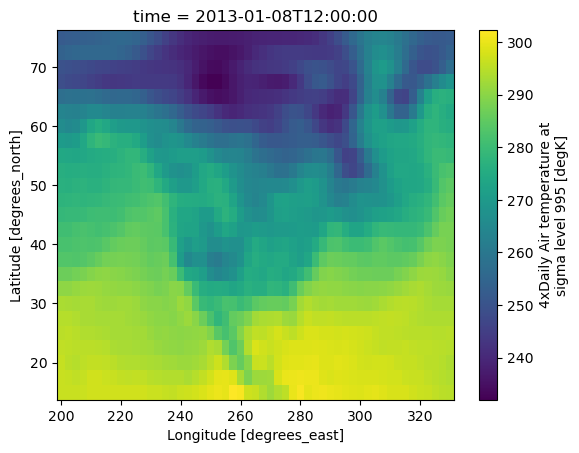

In [21]:
ds['air'].isel(time=30).plot()

 Just to reiterate, we can also select data by the labels directly using `.sel` rather than `.isel`. Here we're selecting out the data for the time `2013-01-01` and plotting it. You can see that the plot is the same as the one above.

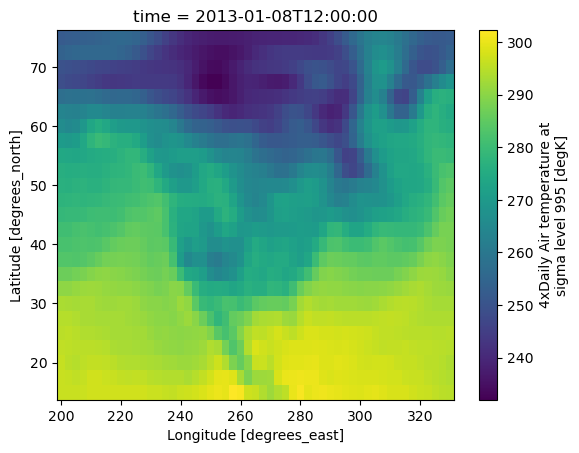

In [48]:
ds['air'].sel(time='2013-01-08 12:00').plot()

Like pandas xarray has some really nice ways to aggregate
and transform the data. For example, if we want to smooth
out the temperature data for Tucson by taking the 30 day
moving average we can do that with a "rolling" operation:
   

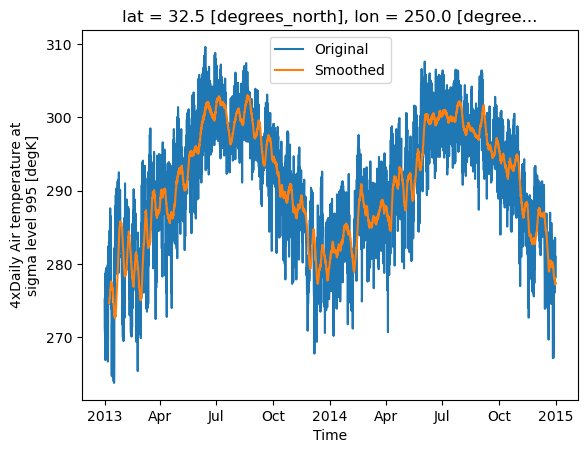

In [22]:
tucson_ds['air'].plot(label='Original')
tucson_ds['air'].rolling(time=30).mean().plot(label='Smoothed')
plt.legend()

Similarly, we can do groupby's. Here we'll take the seasonal
average across time, which creates a new dimension and coordinate

In [23]:
season = tucson_ds['time'].dt.season
seasonal_avg_airtemp = ds['air'].groupby(season).mean()
seasonal_avg_airtemp

<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)>
array([[[247.01007, 246.95503, 246.71684, ..., 241.55386, 242.69449,
         244.23262],
        [248.83022, 248.98196, 248.93813, ..., 240.31064, 242.24562,
         245.32053],
        [250.95328, 250.49544, 250.07674, ..., 241.26309, 244.65495,
         249.44342],
        ...,
        [296.19055, 295.5512 , 295.43677, ..., 295.39368, 294.8794 ,
         294.33405],
        [296.939  , 296.83542, 296.46448, ..., 295.6107 , 295.42157,
         294.959  ],
        [297.4473 , 297.49   , 297.24048, ..., 296.29694, 296.13766,
         296.05698]],

       [[273.39032, 273.2029 , 273.011  , ..., 264.78116, 266.19952,
         267.94702],
        [274.33145, 274.48965, 274.63034, ..., 263.89758, 265.93015,
         268.56693],
        [278.7285 , 279.0914 , 279.4369 , ..., 264.95203, 267.38788,
         270.48755],
...
        [296.76483, 296.2117 , 295.9462 , ..., 295.5077 , 294.8774 ,
         294.3801 ],
        [297.43817, 297.3017 , 296.8633 , ..., 295.5603 , 295.31448,
         294.91473],
        [297.8931 , 297.9006 , 297.60345, ..., 295.88574, 295.74725,
         295.72275]],

       [[261.96924, 261.61057, 261.15253, ..., 248.58957, 249.53653,
         250.96701],
        [267.2477 , 267.07742, 266.83246, ..., 247.14966, 248.85371,
         251.75676],
        [268.2268 , 266.99548, 266.33118, ..., 247.50015, 250.78438,
         255.50696],
        ...,
        [298.80624, 298.0542 , 297.75958, ..., 298.73898, 298.367  ,
         297.99283],
        [299.2114 , 299.02353, 298.54553, ..., 298.85175, 298.93045,
         298.72104],
        [299.21207, 299.26212, 299.0019 , ..., 299.36758, 299.37134,
         299.47427]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Further, xarray gives very convenient ways to quickly visualize
data in common ways. For instance, if we want to see the maps
of all four seasons from before we can just give the `plot`
function the keyword `col`, which means plot a new column for
each "instance" of that dimension. The `col_wrap` tells it to
wrap to a new row after 2 columns. I'm also changing the colormap
to make it easier to see the differences between seasons

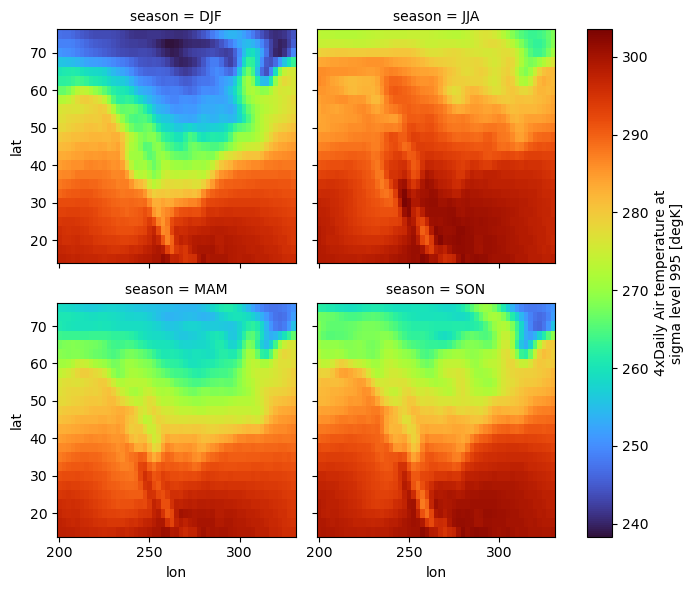

In [24]:
seasonal_avg_airtemp.plot(col='season', col_wrap=2, cmap='turbo')

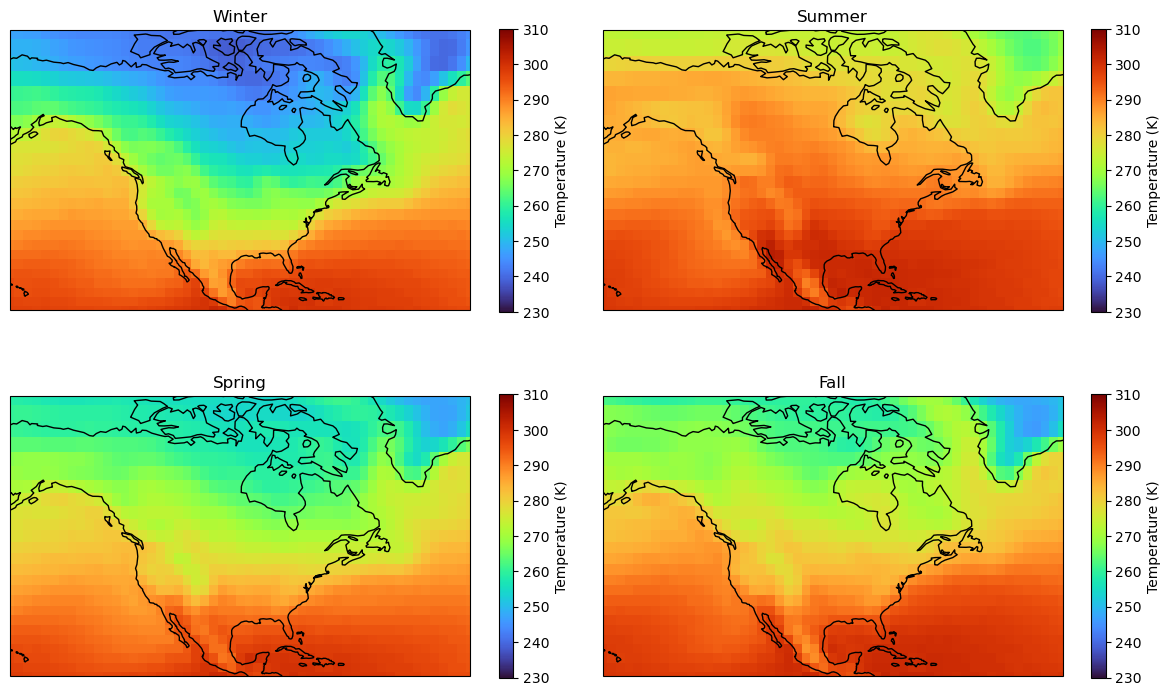

In [46]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(2,2, figsize=(12,8), subplot_kw={'projection': ccrs.Miller()})

min_lat, min_lon = ds['lat'].min().values, ds['lon'].min().values
max_lat, max_lon = ds['lat'].max().values, ds['lon'].max().values

season_lookup = {
    'DJF': 'winter',
    'MAM': 'spring',
    'JJA': 'summer',
    'SON': 'fall'
}

for i in range(len(seasonal_avg_airtemp.season)):
    season = seasonal_avg_airtemp.season[i].values[()]
    ax.flat[i].set_global()
    seasonal_avg_airtemp.sel(season=season).plot(
        ax=ax.flat[i], transform=ccrs.PlateCarree(), 
        cmap='turbo', vmin=230 , vmax=310, 
        cbar_kwargs={'label': 'Temperature (K)', 'shrink': 0.7}
    )
    ax.flat[i].set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.flat[i].coastlines()
    ax.flat[i].set_title(season_lookup[season].capitalize())

plt.tight_layout()

# Okay, that's it for this super fast overview!